### Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score

## EDA

### Loading the Dataset

In [92]:
df_stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [93]:
print("Number of Rows:",df_stroke.shape[0])
print("Number of Columns:",df_stroke.shape[1])

Number of Rows: 5110
Number of Columns: 12


From above, we can see that the data has 12 coulmns. Let's see what are these columns

In [94]:
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [95]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [96]:
#description of percent of data object columns
cols=df_stroke.select_dtypes(include=['object']).columns.tolist()
#create iteration of object columns
for i in cols:
    count=df_stroke.groupby(['stroke'])[i].value_counts()[1]
    percent=df_stroke.groupby(['stroke'])[i].value_counts(normalize=True)[1]
    display(pd.DataFrame({"Patients":count, "Percent":percent*100})
            .sort_values("Percent", ascending=False)
            .style.set_caption('Variable: {}'.format(i))
            .format({"Percent": "{:,.1f}%"})
            .highlight_max(props='font-weight:bold; color:Black', axis=0))
    print("\n\n")

,Patients,Percent
gender,,
Female,141,56.6%
Male,108,43.4%


,Patients,Percent
ever_married,,
Yes,220,88.4%
No,29,11.6%


,Patients,Percent
work_type,,
Private,149,59.8%
Self-employed,65,26.1%
Govt_job,33,13.3%
children,2,0.8%


,Patients,Percent
Residence_type,,
Urban,135,54.2%
Rural,114,45.8%


,Patients,Percent
smoking_status,,
never smoked,90,36.1%
formerly smoked,70,28.1%
Unknown,47,18.9%
smokes,42,16.9%


In [97]:
#removing ID column as it is not useful for the prediction model
del df_stroke['id']
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [98]:
df_stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [99]:
#Replace Gender labelled as Other as NULL
df_stroke ['gender'] = df_stroke['gender'].replace(['Other'], np.nan)

There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable.

In [100]:
df_stroke.isnull().sum()

gender                 1
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We observe multiple NaN values for the bmi category (exactly 201 values) and 1 for gender category. 

In [101]:
#Removing the row containing null value for gender
df_stroke = df_stroke[df_stroke['gender'].notnull()]


In [102]:
df_stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [103]:
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: title={'center': 'Gender Representation'}, ylabel='gender'>

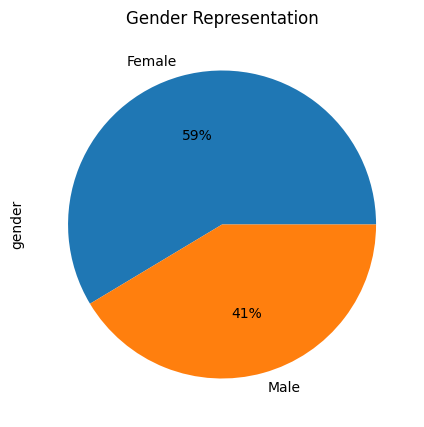

In [104]:
fig, ax = plt.subplots(figsize=(10, 5))
df_stroke['gender'].value_counts().plot(kind = "pie",autopct = "%.0f%%", title = 'Gender Representation')

Gender represenation of male and female classes is sufficient. 

<Axes: title={'center': 'Married People Representation'}, ylabel='ever_married'>

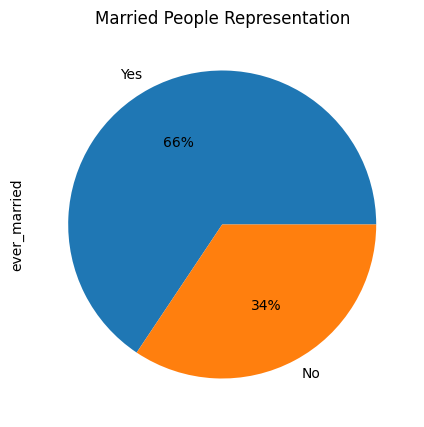

In [105]:
fig, ax = plt.subplots(figsize=(10, 5))
df_stroke['ever_married'].value_counts().plot(kind = "pie",autopct = "%.0f%%", title = 'Married People Representation')

<Axes: title={'center': 'Work type distribution'}, ylabel='work_type'>

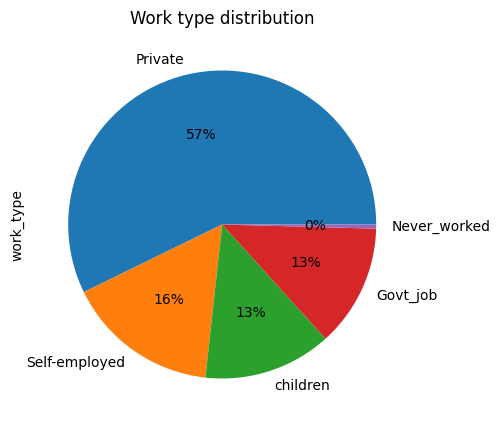

In [106]:
fig, ax = plt.subplots(figsize=(10, 5))
df_stroke['work_type'].value_counts().plot(kind = "pie",autopct = "%.0f%%", title = 'Work type distribution')

It is clear that those who have never worked are underrepresented. Thus, machine learning models may not perform well on this class



<Axes: title={'center': 'Urban-Rural Distribution'}, ylabel='Residence_type'>

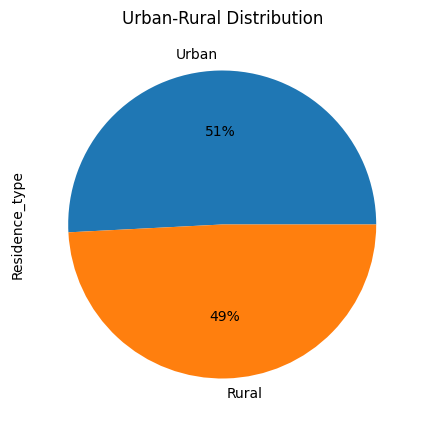

In [107]:
fig, ax = plt.subplots(figsize=(10, 5))
df_stroke["Residence_type"].value_counts().plot(kind = "pie",autopct = "%.0f%%", title = 'Urban-Rural Distribution')

Both urban and rural classes are equally represented.

<Axes: title={'center': 'Smoking status'}, ylabel='smoking_status'>

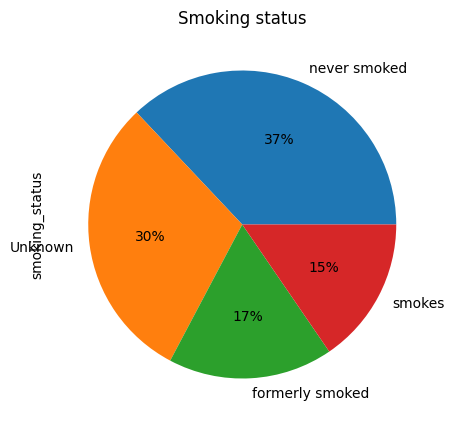

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
df_stroke["smoking_status"].value_counts().plot(kind = "pie",autopct = "%.0f%%", title = 'Smoking status', ax=ax)

It is clear that all classes are adequately represented. However, we don't have information about the smoking status of 30% of the population. This may bring down the performance of our models.

Text(0.5, 1.0, 'Gender vs Chance of Stroke')

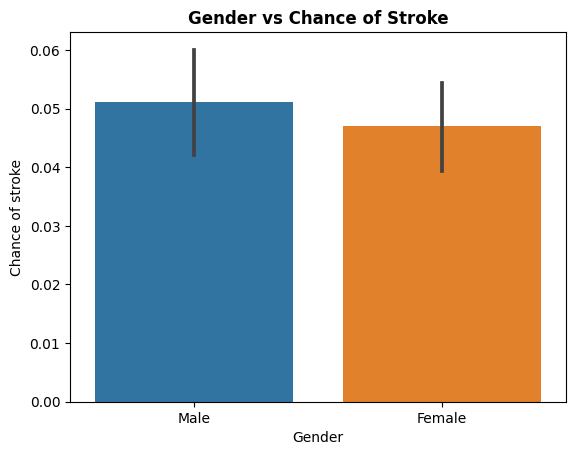

In [109]:
sns.barplot(x = 'gender',
            y = 'stroke',
            data = df_stroke)
plt.xlabel("Gender")
plt.ylabel("Chance of stroke")
plt.title("Gender vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})


The chance of stroke look the same for male and female people.

Text(0.5, 1.0, 'Hypertension vs Chance of Stroke')

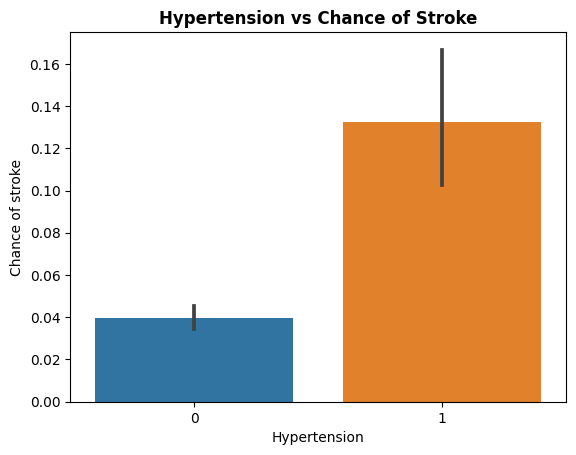

In [110]:
sns.barplot(x = 'hypertension',
            y = 'stroke',
            data = df_stroke)
plt.xlabel("Hypertension")
plt.ylabel("Chance of stroke")
plt.title("Hypertension vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})

Hypertension is known to be a significant factor in occurance of stroke. Clearly, from the plot the chance of stroke is high for people with hypertension.

Text(0.5, 1.0, 'Heartdisease vs Chance of Stroke')

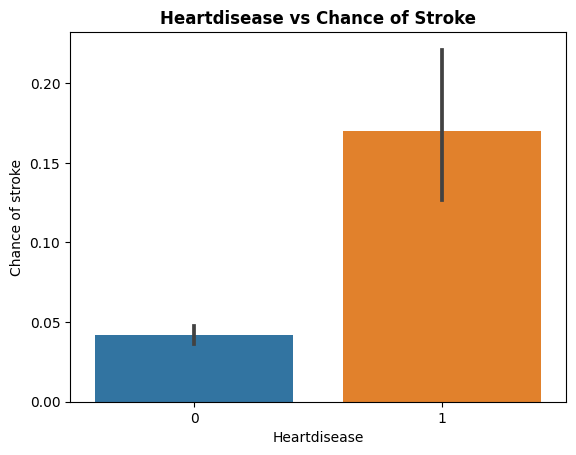

In [111]:
sns.barplot(x = 'heart_disease',
            y = 'stroke',
            data = df_stroke)
plt.xlabel("Heartdisease")
plt.ylabel("Chance of stroke")
plt.title("Heartdisease vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})

Heart disease are known to increase the risk of a person getting the stroke. Clearly from the plot we can see that the chance of stroke increases for people with heart disease.

Text(0.5, 1.0, 'Married vs Chance of Stroke')

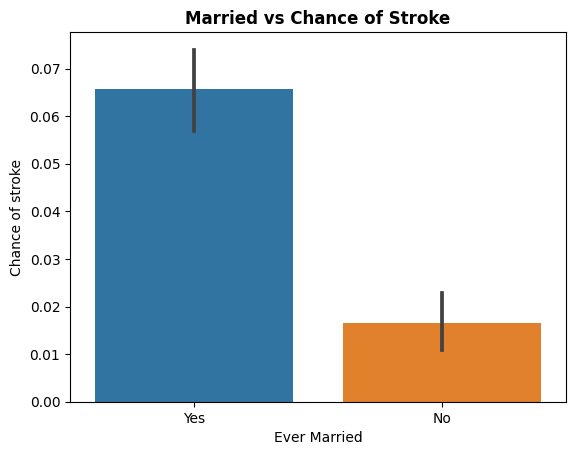

In [112]:
sns.barplot(x = 'ever_married',
            y = 'stroke',
            data = df_stroke)
plt.xlabel("Ever Married")
plt.ylabel("Chance of stroke")
plt.title("Married vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})

Risk of stroke on married people is high. Perhaps married people have more responsibilities and are subjected to more pressure and that is life.

Text(0.5, 1.0, 'Work type vs Chance of Stroke')

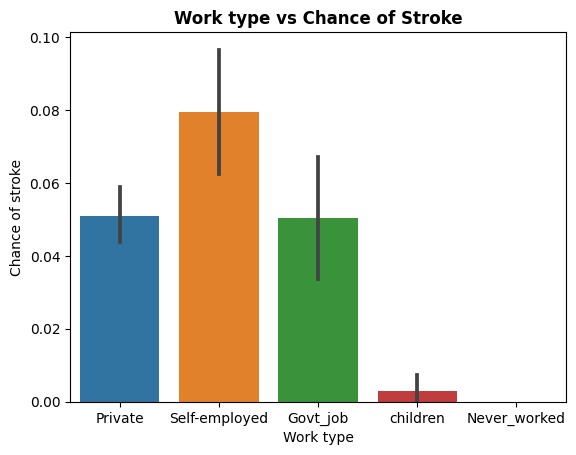

In [113]:
sns.barplot(x = 'work_type',
            y = 'stroke',
            data = df_stroke)
plt.xlabel("Work type")
plt.ylabel("Chance of stroke")
plt.title("Work type vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})

We can see from the plot that the chance of stroke for people who are self-employed is higher than rest, and for people who have never worked(including children) it is quite low.

Text(0.5, 1.0, 'Smoking Status vs Chance of Stroke')

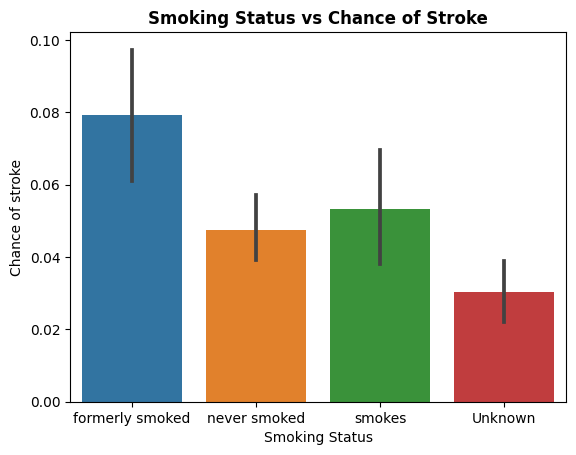

In [114]:
sns.barplot(x = 'smoking_status',
            y = 'stroke',
            data = df_stroke)
plt.xlabel("Smoking Status")
plt.ylabel("Chance of stroke")
plt.title("Smoking Status vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})

From the plot, we can see that the chance of stroke for the people who have formerly smoked is high, followed by people who currently smoke, people who have never smoked, and people whose smoking status is not known.

Text(0.5, 1.0, 'Residence type vs Chance of Stroke')

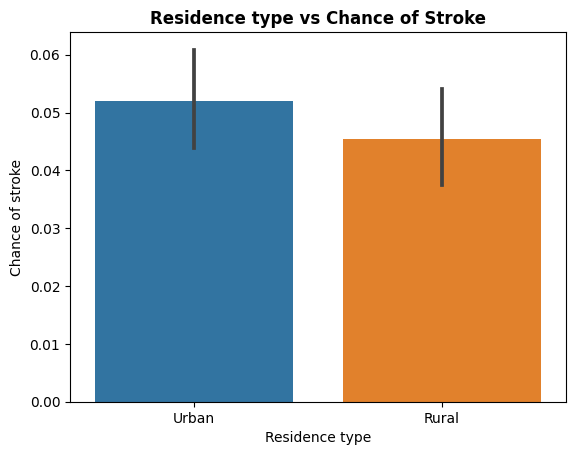

In [115]:
sns.barplot(x = 'Residence_type',
            y = 'stroke',
            data = df_stroke)
plt.xlabel("Residence type")
plt.ylabel("Chance of stroke")
plt.title("Residence type vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})

Urban people have more strokes as compared to people living in rural areas

Text(0.5, 1.0, 'Age vs Chance of Stroke')

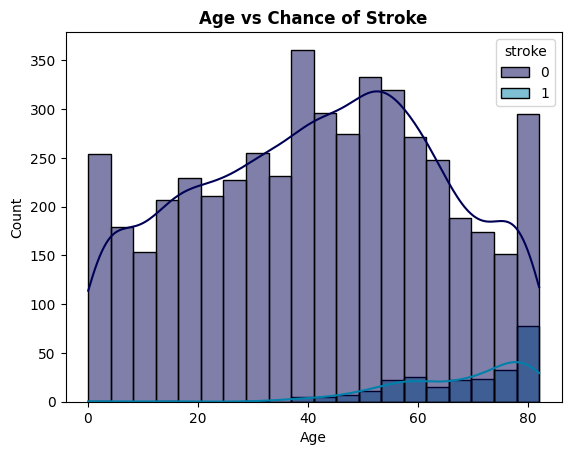

In [116]:
sns.histplot(x = df_stroke['age'], 
             hue= df_stroke['stroke'], kde= True, palette = 'ocean')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})


We clearly spot a pattern in the distribution of Age. Older people have a much higher chance of getting a stroke as compared to younger individuals.

Text(0.5, 1.0, 'Average Glucose Level vs Chance of Stroke')

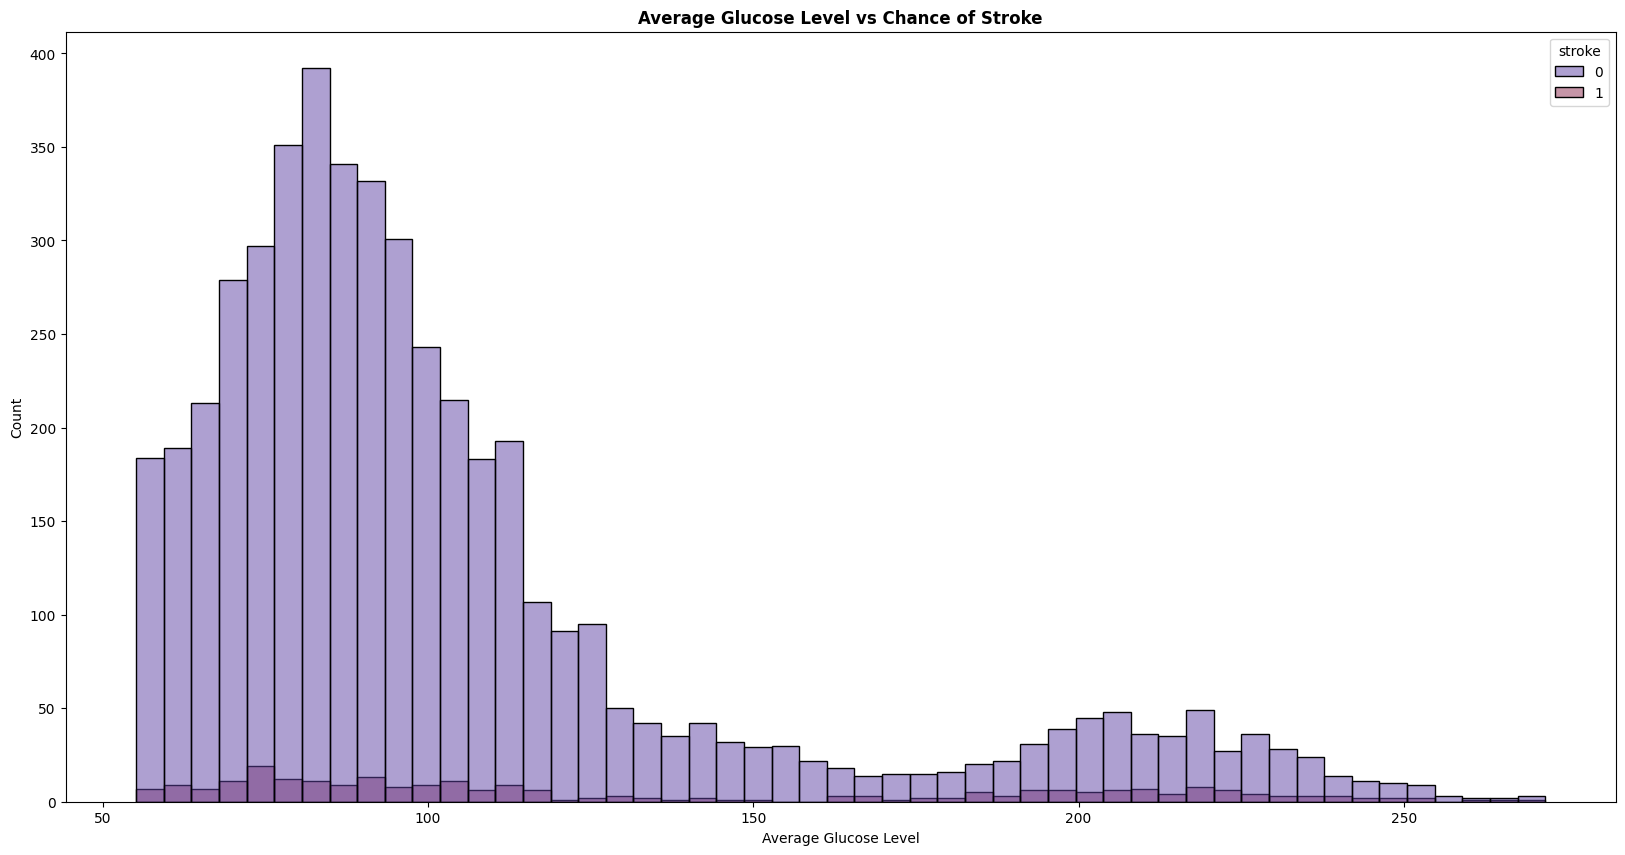

In [117]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(x = df_stroke['avg_glucose_level'], 
             hue= df_stroke['stroke'], ax=ax, palette = 'twilight')
plt.xlabel("Average Glucose Level")
plt.ylabel("Count")
plt.title("Average Glucose Level vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})


Text(0.5, 1.0, 'BMI vs Chance of Stroke')

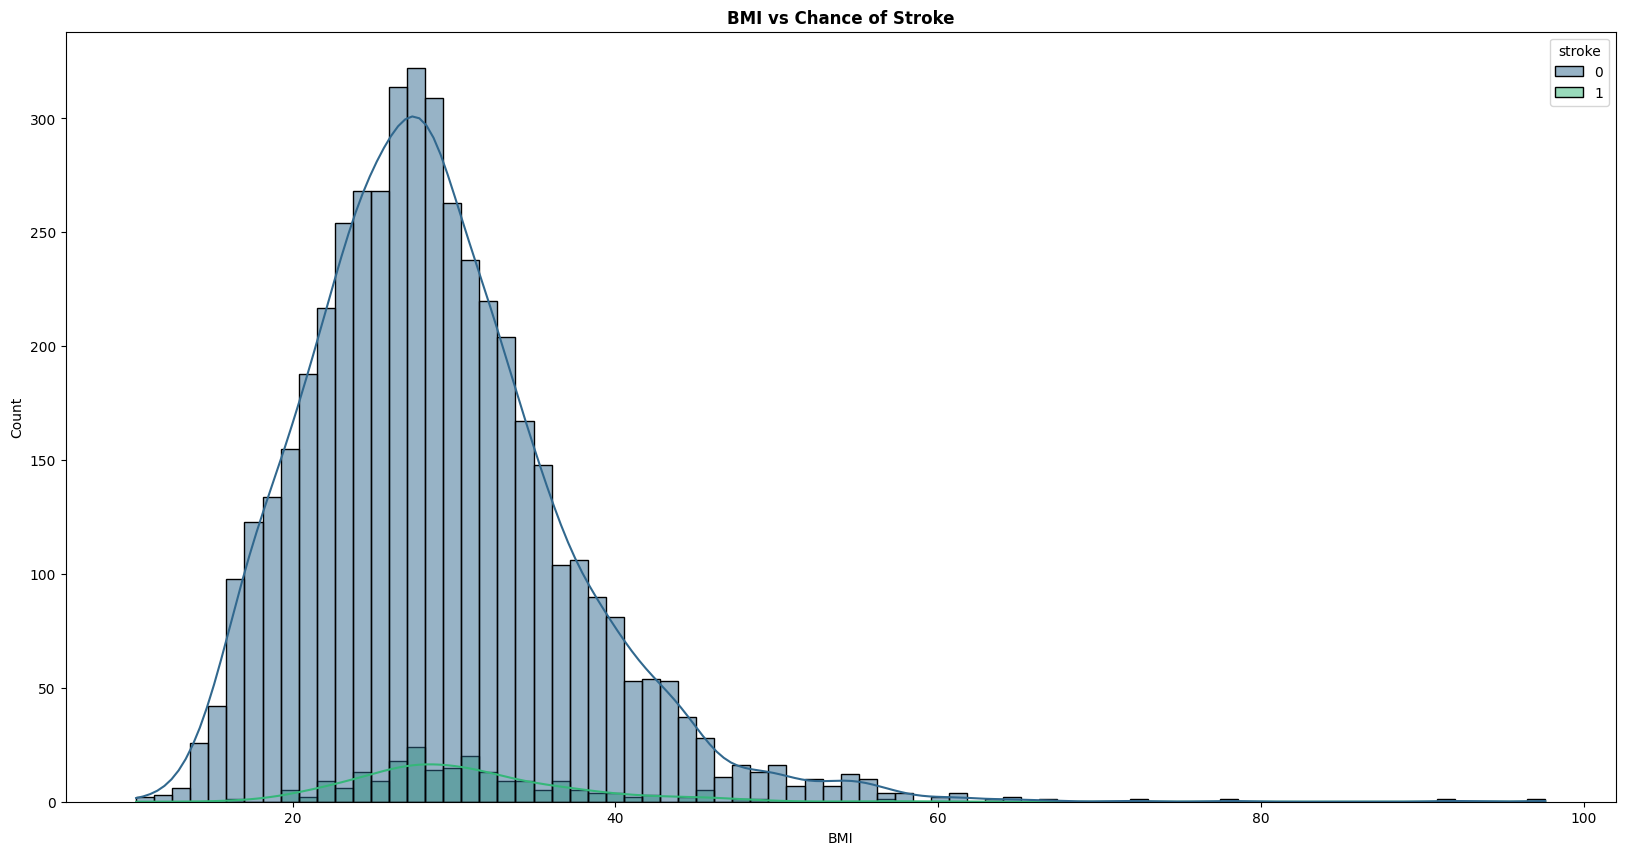

In [118]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(x = df_stroke['bmi'], 
             hue= df_stroke['stroke'], kde= True, palette = 'viridis', ax=ax)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI vs Chance of Stroke", fontdict= {'color': 'black', 'fontweight':'bold'})

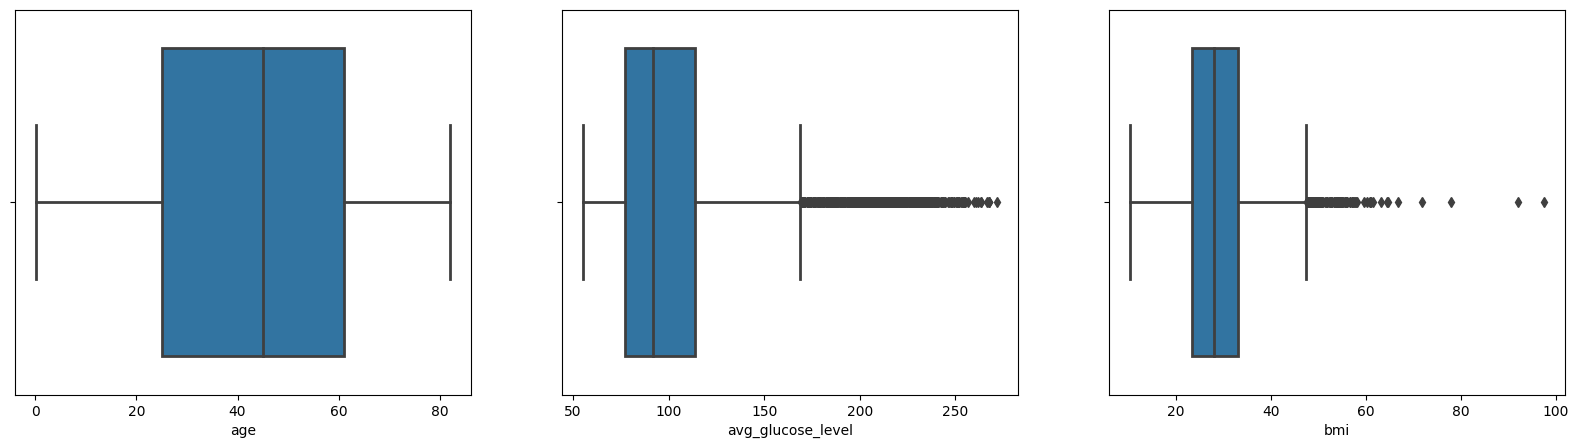

In [119]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(x = df_stroke['age'], ax= ax[0],linewidth= 2)
sns.boxplot(x = df_stroke['avg_glucose_level'], ax= ax[1],linewidth= 2)
sns.boxplot(x = df_stroke['bmi'], ax= ax[2],linewidth= 2)
plt.show()

We clearly have a lot of outliers in avg_glucose_level and BMI column.

Let us deal with outliers in the avg_glucose_level and bmi column. I will apply log transformation to these columns

In [120]:
for col in ['avg_glucose_level', 'bmi']:
    df_stroke[col] = np.log(df_stroke[col])

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\1366180349.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'Percentage of People Having Strokes'}, ylabel='stroke'>

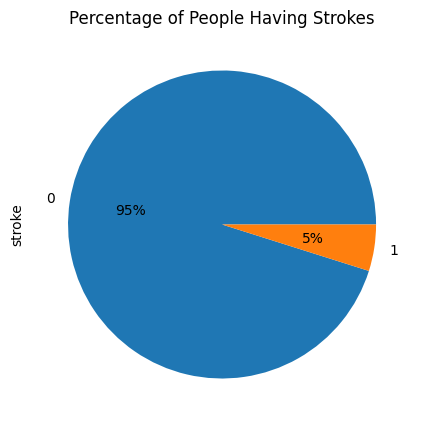

In [121]:
fig, ax = plt.subplots(figsize=(10, 5))
df_stroke["stroke"].value_counts().plot(kind = "pie",autopct = "%.0f%%", title = 'Percentage of People Having Strokes')

A huge imbalance of the classes is found here. We would have to oversample the minority class.

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\2726197439.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



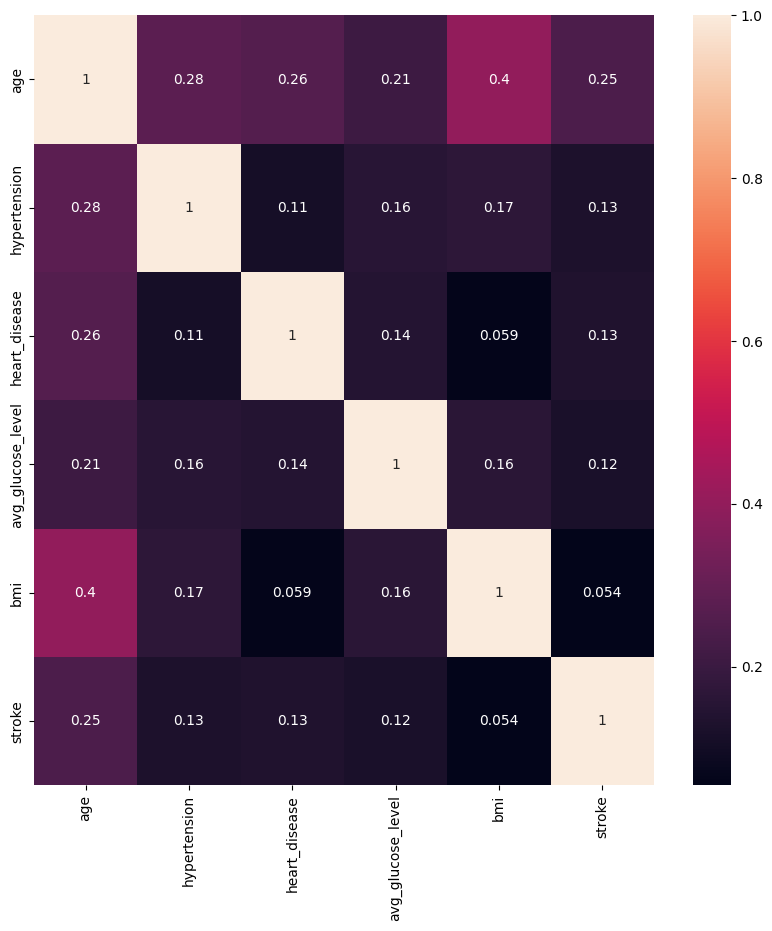

In [122]:
corrmat = df_stroke.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_stroke[top_corr_features].corr(),annot=True)

Not much correlation between independent variables.

## Data Preprocessing

### Impute Missing Values

 I will use interpolation to fetch the nearest form of data to fill the missing values

In [123]:
df_stroke['bmi'] = df_stroke['bmi'].interpolate(method ='linear')

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\1061915876.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
df_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Encoding Categorical Variables

In [125]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [126]:
df_stroke.select_dtypes("object").columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [127]:
from sklearn.preprocessing import LabelEncoder
d_types=dict(df_stroke.dtypes)
for name,type_ in d_types.items():
  if str(type_) == "object":
    le=LabelEncoder()
    df_stroke[name]=le.fit_transform(df_stroke[name])

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\985950256.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\985950256.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\985950256.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [128]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int32  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int32  
 5   work_type          5109 non-null   int32  
 6   Residence_type     5109 non-null   int32  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int32  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 379.2 KB


### Feature Importance


Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset.

In [129]:
# separating the data and label
X=df_stroke.drop(['stroke'],axis=1)
Y=df_stroke['stroke']

In [130]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [131]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03272948 0.25300323 0.02419131 0.0213614  0.01874143 0.05980567
 0.03630193 0.24995183 0.2207144  0.08319932]


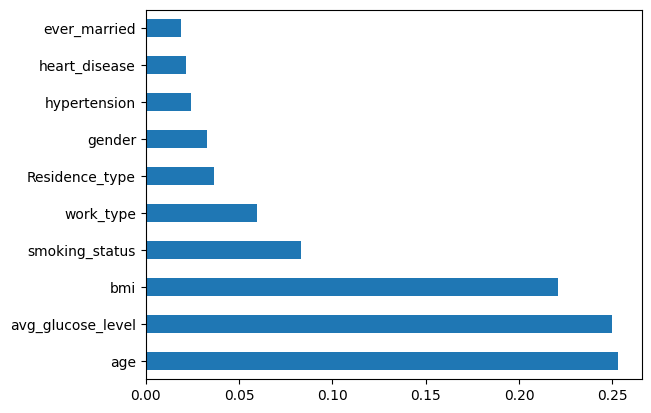

In [132]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From above graph we can see that 'avg_glucose_level', 'age' and 'bmi' are the most important features.

### Handling Imbalanced Data

In this dataset, we are going to use one of oversampling technique called Synthetic Minority Oversampling Technique (SMOTE). It is a technique which is generally use to avoid overfitting, as random elimination or replication of data from minority to majority can sometimes lead to overfitting.

Synthetic Sampling is an extension or advanced version of Random Over Sampling. The only difference between them is the way of sampling.

Synthetic Sampling: In this a subset of Data is taken from the minority class as an example and then the new synthetic similar instances are created. These synthetic instances are then added to the original dataset. Hence, in Synthetic Sampling new data is created Synthetically instead of replicating the data.

In [133]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
sm.fit(X,Y)
X_resampled,y_resampled=sm.fit_resample(X,Y)

In [134]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 4860, 1: 4860}

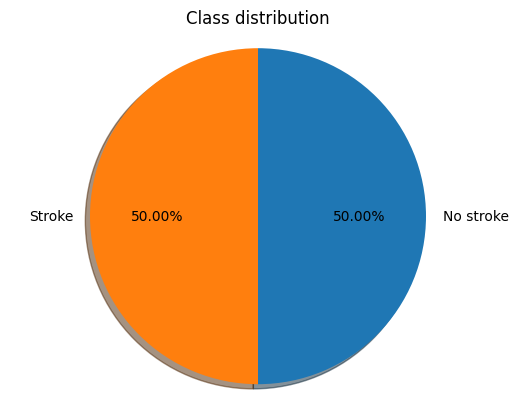

# samples associated with no stroke: 4860
# samples associated with stroke: 4860


In [135]:
_, class_counts = np.unique(y_resampled, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

### Splitting the Data

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,stratify=y_resampled,random_state=42)

### Scaling of numerical columns

In [137]:
num_cols=['age','avg_glucose_level','bmi']
scaler=StandardScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
9192,1,1.002279,0,0,1,3,0,1.043376,0.571412,0
3629,1,0.142171,0,0,1,0,0,1.679953,1.436913,2
9526,0,0.574102,0,1,1,2,1,2.081904,1.343302,1
539,0,-0.534678,0,0,1,2,0,-0.732403,2.617270,0
5479,1,1.134882,0,0,1,2,0,-0.037543,0.347168,2


## Model Building

### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [139]:
y_pred_log=model_log.predict(X_test)
y_pred_log

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [140]:
accuracy_log= accuracy_score(y_pred_log,y_test)
print("Accuracy of Logistic Regression Model:", accuracy_log*100)

Accuracy of Logistic Regression Model: 79.59533607681756


[[1107  244]
 [ 351 1214]]


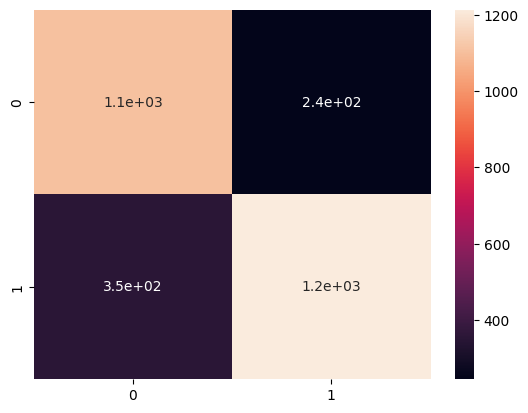

In [141]:
cm=confusion_matrix(y_pred_log,y_test)
sns.heatmap(cm,annot=True)
print(cm)

In [142]:
print(classification_report(y_pred_log,y_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1351
           1       0.83      0.78      0.80      1565

    accuracy                           0.80      2916
   macro avg       0.80      0.80      0.80      2916
weighted avg       0.80      0.80      0.80      2916



### Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier

model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
y_pred_tree=model_tree.predict(X_test)
y_pred_tree

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [145]:
accuracy_tree= accuracy_score(y_pred_tree,y_test)
print("Accuracy of Decision Tree Model:", accuracy_tree*100)

Accuracy of Decision Tree Model: 89.4718792866941


[[1277  126]
 [ 181 1332]]


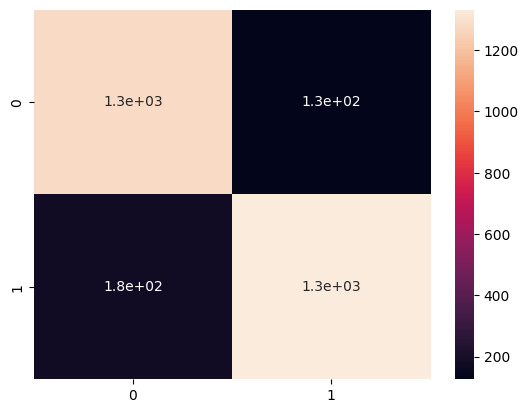

In [146]:
cm=confusion_matrix(y_pred_tree,y_test)
sns.heatmap(cm,annot=True)
print(cm)

In [147]:
print(classification_report(y_pred_tree,y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1403
           1       0.91      0.88      0.90      1513

    accuracy                           0.89      2916
   macro avg       0.89      0.90      0.89      2916
weighted avg       0.90      0.89      0.89      2916



### Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

model_random=RandomForestClassifier()
model_random.fit(X_train.values,y_train)

RandomForestClassifier()

In [149]:
y_pred_random=model_random.predict(X_test)
y_pred_random

c:\Users\gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [150]:
accuracy_random= accuracy_score(y_pred_random,y_test)
print("Accuracy of Random Forest Classifier:", accuracy_random* 100)

Accuracy of Random Forest Classifier: 93.44993141289437


[[1310   43]
 [ 148 1415]]


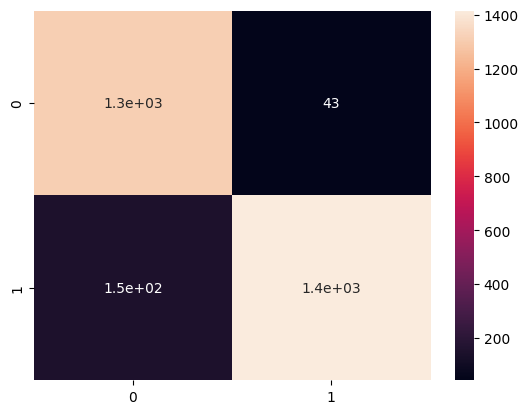

In [151]:
cm=confusion_matrix(y_pred_random,y_test)
sns.heatmap(cm,annot=True)
print(cm)

In [152]:
print(classification_report(y_pred_random,y_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1353
           1       0.97      0.91      0.94      1563

    accuracy                           0.93      2916
   macro avg       0.93      0.94      0.93      2916
weighted avg       0.94      0.93      0.93      2916



### Support Vector Machine

In [153]:
from sklearn.svm import SVC
svc_clf=SVC(kernel="rbf")
svc_clf.fit(X_train,y_train)

SVC()

In [154]:
y_pred_svm=svc_clf.predict(X_test)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [155]:
accuracy_svm= accuracy_score(y_pred_svm,y_test)
print("Accuracy of SVM Model:", accuracy_svm*100)

Accuracy of SVM Model: 83.7448559670782


[[1134  150]
 [ 324 1308]]


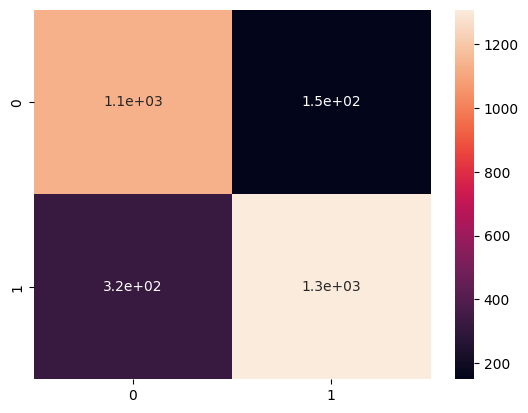

In [156]:
cm=confusion_matrix(y_pred_svm,y_test)
sns.heatmap(cm,annot=True)
print(cm)

In [157]:
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1284
           1       0.90      0.80      0.85      1632

    accuracy                           0.84      2916
   macro avg       0.84      0.84      0.84      2916
weighted avg       0.84      0.84      0.84      2916



### Comparision of the Models

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\2086178520.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\2086178520.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\2086178520.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\gupta\AppData\Local\Temp\ipykernel_21028\2086178520.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

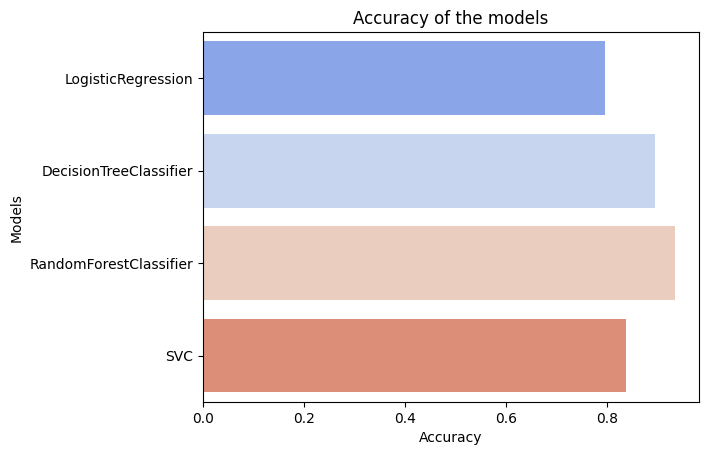

In [158]:
models = [model_log,model_tree,model_random,svc_clf]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test) 
    result = pd.DataFrame([[names, accuracy]], columns= ["Models","Accuracy"])
    results = results.append(result)


sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy')
plt.title('Accuracy of the models');


From the above Accuracy graph of 4 models we can see that random forest model gives us the highest accuarcy model with a accuracy score around 93%. So lets perform hyperparameter tuning on Random Forest to improve its accuracy.

### Hyperparameter Tuning the Random Forest 

In [159]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model_random.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


According to the documentation on the random forest in Scikit-Learn the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). I will try adjusting the following set of hyperparameters:

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

Random Hyperparameter Grid

In [160]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


The benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

Random Search Training

In [161]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_rf= RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
model_rf_improved = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_rf_improved.fit(X_train.values,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [162]:
model_rf_improved.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [163]:
y_pred_random_improved=model_rf_improved.predict(X_test)
y_pred_random_improved

c:\Users\gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [164]:
accuracy_random_improved= accuracy_score(y_pred_random_improved,y_test)
print("Accuracy of Improved Random Forest Classifier:", accuracy_random_improved*100)

Accuracy of Improved Random Forest Classifier: 94.20438957475994


I have achieved an improvement in accuracy of almost 2%. Depending on my application which is stroke prediction, this is a significant benefit. 

## Save the Model

In [165]:
import joblib
joblib_file="Stroke.h5"
joblib.dump(model_rf_improved, joblib_file)

['Stroke.h5']